
Kruskal-Wallis Test: H = 0.0374, p = 0.9815


<Figure size 800x600 with 0 Axes>

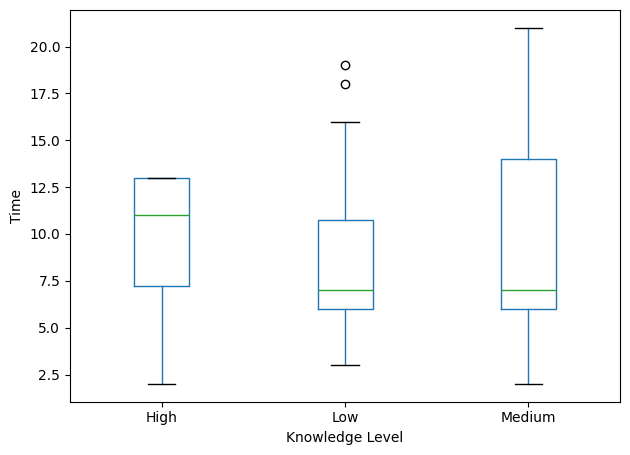

(    Time       A
 0      6  Medium
 1     19  Medium
 2     19     Low
 3     14  Medium
 4     12  Medium
 5      3     Low
 6      7  Medium
 7     14  Medium
 8     21  Medium
 9     13    High
 10    17  Medium
 11     7     Low
 12    13    High
 13    18     Low
 14     7  Medium
 15     6     Low
 16    16     Low
 17     6     Low
 18    15  Medium
 19     8  Medium
 20     5  Medium
 21     9     Low
 22     3  Medium
 23     2  Medium
 24     7     Low
 25     8  Medium
 26     7  Medium
 27     6  Medium
 28     2    High
 29     3  Medium
 30    11     Low
 31     9    High
 32     3     Low
 33     7  Medium
 34    10     Low
 35     6     Low
 36     7     Low
 37     6  Medium,
 'The level of knowledge in the topic does not appear to have a statistically significant impact on the response time.')

In [ ]:
from server.knowledge import knowledgeSpecificByTime
# knowledgeSpecificByTime("Use of LLMs in Software Development")
knowledgeSpecificByTime("Requirements Engineering or Software Analysis")

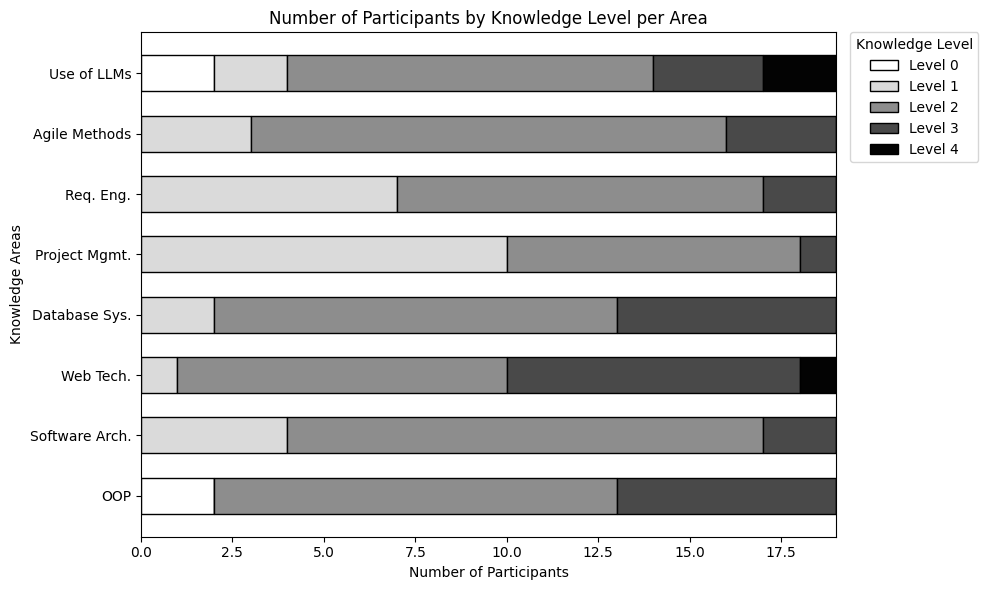

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados da tabela
data = {
    'Code': ['P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007', 'P008', 'P009', 'P010',
             'P011', 'P012', 'P013', 'P014', 'P015', 'P016', 'P017', 'P018', 'P019'],
    'Object-Oriented Programming': [2, 2, 0, 2, 2, 3, 2, 0, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3],
    'Software Architecture': [2, 2, 1, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2],
    'Web Tecnologies': [2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 3, 2, 3, 2, 2, 2, 3, 1, 2],
    'Database Systems': [2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 1, 1, 3, 2, 3],
    'Project Management': [2, 1, 1, 1, 3, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2],
    'Requirements Engineering': [2, 2, 1, 2, 2, 1, 2, 2, 2, 3, 2, 1, 3, 1, 2, 1, 1, 1, 2],
    'Agile Methods': [2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 2, 2, 2, 2, 1, 1, 2],
    'Use of LLMs': [2, 2, 3, 2, 4, 1, 2, 2, 2, 4, 2, 2, 0, 1, 2, 0, 3, 2, 3]
}

# Cria o DataFrame
df = pd.DataFrame(data)

# Seleciona as colunas de conhecimento
knowledge_areas = df[['Object-Oriented Programming', 'Software Architecture', 'Web Tecnologies',
                      'Database Systems', 'Project Management', 'Requirements Engineering',
                      'Agile Methods', 'Use of LLMs']]

# Define os níveis de conhecimento
knowledge_levels = sorted(df[knowledge_areas.columns].stack().unique())

# Prepara os dados para o gráfico de barras horizontais acumuladas
bar_height = 0.6
index = range(len(knowledge_areas.columns))
colors = ["#ffffff", "#dadada", "#8d8d8d", "#494949", "#030303"]  # Cores para cada nível

fig, ax = plt.subplots(figsize=(10, 6))

left = [0] * len(knowledge_areas.columns)

for i, level in enumerate(knowledge_levels):
    counts = knowledge_areas.apply(lambda col: (col == level).sum(), axis=0)
    ax.barh(
        index,
        counts,
        height=bar_height,
        left=left,
        label=f'Level {level}',
        color=colors[i],
        edgecolor='black'  # Adiciona borda preta às barras
    )
    left = [l + c for l, c in zip(left, counts)]

# Define os rótulos do eixo y
english_labels = ['OOP', 'Software Arch.', 'Web Tech.', 'Database Sys.',
                  'Project Mgmt.', 'Req. Eng.', 'Agile Methods', 'Use of LLMs']
ax.set_ylabel('Knowledge Areas')
ax.set_xlabel('Number of Participants')
ax.set_title('Number of Participants by Knowledge Level per Area')
ax.set_yticks(index)
ax.set_yticklabels(english_labels)

# Posiciona a legenda fora do gráfico, à direita
ax.legend(title='Knowledge Level', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()
